### Алгоритмы уменьшения размерности 

#### Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from dataget.image import fashion_mnist
from gensim.downloader import load

In [2]:
coil20 = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')

In [3]:
mnist = pd.read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.csv")

In [4]:
fmnist_x, fmnist_y = fashion_mnist().get()[2:4]

In [5]:
word_vectors = load('word2vec-google-news-300').vectors

In [6]:
mnist = mnist[:10000]
fmnist_x = fmnist_x.reshape(-1, 28*28)
word_vectors = word_vectors[:10000]

In [7]:
umap = UMAP()
tsne = TSNE(n_jobs=-1)
pca = PCA(n_components=2)

In [8]:
models = [("UMAP", umap), ("t-SNE", tsne), ("PCA", pca)]
datasets = [("COIL20", coil20.drop("1025", axis=1), coil20["1025"]),
            ("MNIST", mnist.drop("class", axis=1), mnist["class"]),
            ("Fashion MNIST", fmnist_x, fmnist_y),
            ("Word Vectors", word_vectors, None)]

D:\Users\Darth_60cx3gr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\Darth_60cx3gr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\Darth_60cx3gr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\Darth_60cx3gr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\Darth_60cx3gr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\Darth_60cx3gr\anaconda3\lib\site

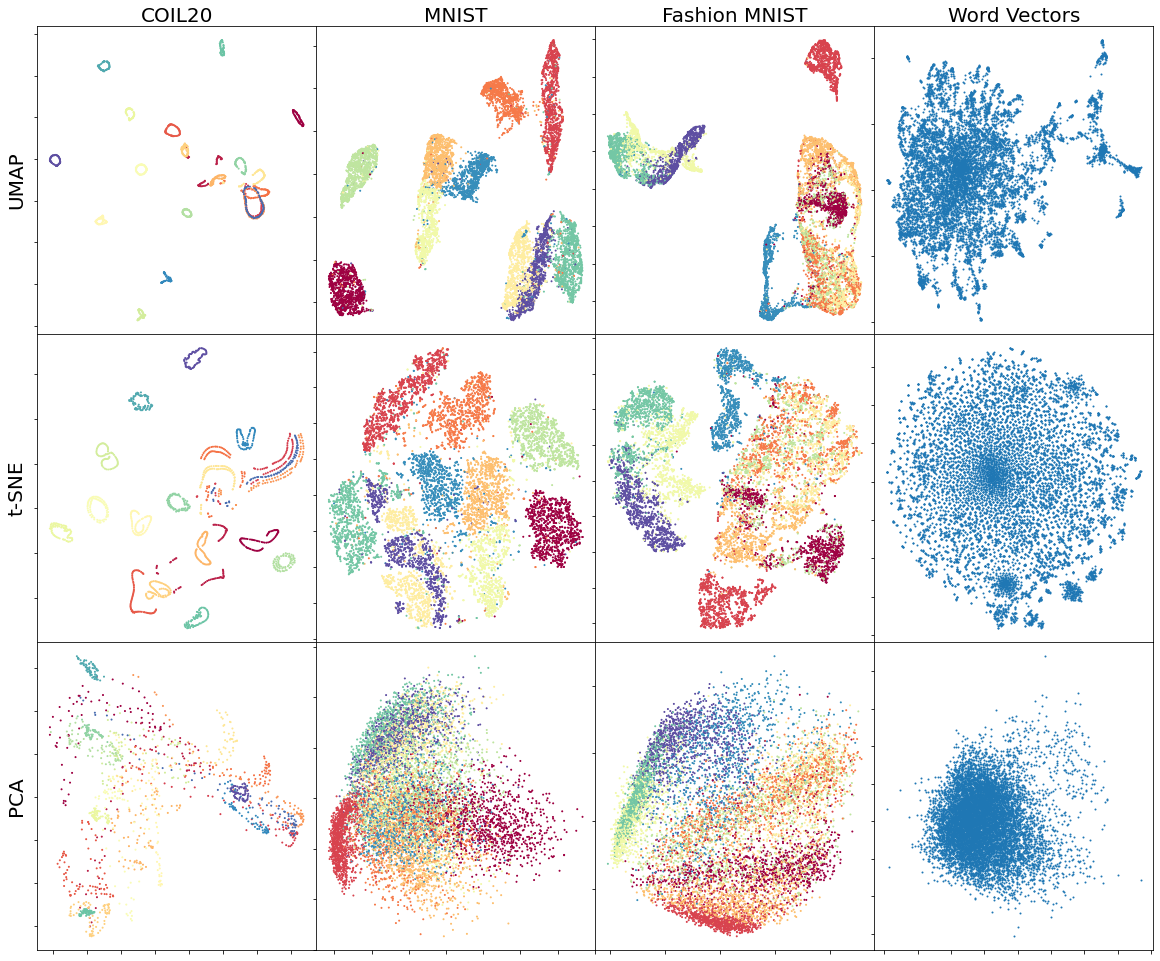

In [9]:
rows = len(models)
cols = len(datasets)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
axs = gs.subplots()
for j in range(cols):
    axs[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    axs[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    axs[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for i in range(rows):
    for j in range(cols):
        embedding = models[i][1].fit_transform(datasets[j][1])
        axs[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        axs[i, j].set_yticklabels([])
        axs[i, j].set_xticklabels([])